In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import os 
os.chdir("drive/MyDrive/AgeandGender")

In [3]:
!ls

agedeneme1.ipynb       agemodel1.json	    genderdeneme4.ipynb
agedeneme2.ipynb       AgeModel3.h5	    GenderModel1.h5
agedeneme3.ipynb       agemodel3.json	    gendermodel1.json
agedeneme4.ipynb       ageModel4.h5	    GenderModel3.h5
agegenderdeneme.ipynb  agemodel4.json	    gendermodel3.json
AgeGenderModel1.h5     data		    images
agegendermodel1.json   genderdeneme1.ipynb  newgnd.ipynb
ageModel1.h5	       genderdeneme3.ipynb


In [4]:
import numpy as np
import pandas as pd
import cv2

wd = os.getcwd()
path = os.path.join(wd, "data/utkface/crop_part1_1")
files = os.listdir(path)
size = len(files)
print("veri sayısı: ", size)

veri sayısı:  5988


In [5]:
labels = np.array([ float(path.split('_')[0]) for path in files])

In [6]:
labels[0]

55.0

In [7]:
values, counts = np.unique(labels, return_counts=True)
print(counts)

[ 61  56  15  40  20  27  49  73  62  29  35  30  44  52  49 100  55  88
  31  59  91 142  92 163 172 301 146 151 150 127 103 153  49  98 139 137
 110  97 142 103  56  92  58  27  68  60  76  64  78 101  50 118 107 104
  44 101  48  89  48  95  39  43  39  26  51  40  43  57  13  50  17  47
  22   6  58  22  13  12   5  53   7  18   3  73  29   5  10   8  37   4
   1  10   1   1]


In [ ]:
images=[]
i=0
for file in files:
  total=path+'/'+file
  print(total," i:",i)
  i=i+1
  image=cv2.imread(total)

  #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image= cv2.resize(image,(64,64))
  images.append(image)

In [14]:
x_data=np.array(images)
x_data.shape

(5988, 64, 64, 3)

In [15]:
len(x_data)

5988

In [16]:
labels.shape

(5988,)

In [18]:
from sklearn.model_selection import train_test_split

In [21]:
train_x,test_x,train_y,test_y = train_test_split(x_data,labels,test_size=0.2)

In [23]:
print("X_train", train_x.shape)
print("x test", test_x.shape)

X_train (4790, 64, 64, 3)
x test (1198, 64, 64, 3)


In [24]:
from tensorflow.keras.applications import MobileNet

In [25]:
import tensorflow.keras.layers as L
import tensorflow as tf

In [26]:
model = tf.keras.Sequential([
    MobileNet(input_shape=(64,64,3),
      include_top=False,
      pooling='avg',
      weights='imagenet'),
      L.Dense(1)
])

17227776/17225924 [==============================] - 0s 0us/step


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 1024)              3228864   
_________________________________________________________________
dense (Dense)                (None, 1)                 1025      
Total params: 3,229,889
Trainable params: 3,208,001
Non-trainable params: 21,888
_________________________________________________________________


In [28]:
model.compile(optimizer='adam',
              loss="mae",
              metrics=['mae'])

In [29]:
model.fit(
    train_x,
    train_y,
    batch_size=32,
    epochs=4,
    validation_data=(test_x,test_y)
)

Epoch 1/4
150/150 [==============================] - 125s 811ms/step - loss: 22.1052 - mae: 22.1052 - val_loss: 10.3059 - val_mae: 10.3059
Epoch 2/4
150/150 [==============================] - 120s 798ms/step - loss: 8.1414 - mae: 8.1414 - val_loss: 8.2515 - val_mae: 8.2515
Epoch 3/4
150/150 [==============================] - 118s 785ms/step - loss: 7.3058 - mae: 7.3058 - val_loss: 8.4150 - val_mae: 8.4150
Epoch 4/4
150/150 [==============================] - 119s 795ms/step - loss: 6.2042 - mae: 6.2042 - val_loss: 7.8119 - val_mae: 7.8119


In [94]:
test_pic=cv2.imread('/content/drive/MyDrive/AgeandGender/images/soso.jpg')

In [95]:
test_pic=cv2.resize(test_pic,(64,64))

In [96]:
from google.colab.patches import cv2_imshow

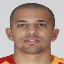

In [97]:
cv2_imshow(test_pic)

In [98]:
test_pic=test_pic.reshape((1,64,64,3))

In [99]:
pred=model.predict(test_pic)

In [100]:
pred

array([[41.281086]], dtype=float32)

In [101]:
import json
from keras.models import load_model
from keras.models import model_from_json
from keras.preprocessing import image

model_json = model.to_json()
with open("agemodel2.json",'w') as json_file:
  json_file.write(model_json)

model.save('ageModel2.h5')
